<a href="https://colab.research.google.com/github/tsarangler/ECON3916-Statistical-Machine-Learning/blob/main/Assignment%201/Econ_3916_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bedroom)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Burrito Bowl', 'Price_2016': 10, 'Price_2024': 16},
    {'Item': 'Spotify', 'Price_2016': 8, 'Price_2024': 14}
]

def calculate_inflation(base,current):
  return ((current-base) / base) * 100

for item in student_basket:
  rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
  print(f"{item['Item']}: {rate:.2f}% Inflation")


Tuition: 28.89% Inflation
Rent (1 Bedroom): 50.00% Inflation
Burrito Bowl: 60.00% Inflation
Spotify: 75.00% Inflation


In [ ]:
import pandas as pd
df = pd.DataFrame(student_basket)

In [27]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='a5094d688b7f176c261a1e0b7cc49847')

# Fetch Series
official_cpi = fred.get_series('CPIAUCSL',
                                observation_start='2016-01-01',
                                observation_end='2024-12-31')
tuition = fred.get_series('CUSR0000SEEB',
                                observation_start='2016-01-01',
                                observation_end='2024-12-31')
rent = fred.get_series('CUSR0000SEHA',
                                observation_start='2016-01-01',
                                observation_end='2024-12-31')
spotify = fred.get_series('CUSR0000SERA02',
                                observation_start='2016-01-01',
                                observation_end='2024-12-31')
bbowl = fred.get_series('CUSR0000SEFV',
                                observation_start='2016-01-01',
                                observation_end='2024-12-31')


In [28]:
official_cpi_norm = (official_cpi / official_cpi.iloc[0]) * 100
tuition_norm = (tuition / tuition.iloc[0]) * 100
rent_norm = (rent / rent.iloc[0]) * 100
spotify_norm = (spotify / spotify.iloc[0]) * 100
bbowl_norm = (bbowl / bbowl.iloc[0]) * 100

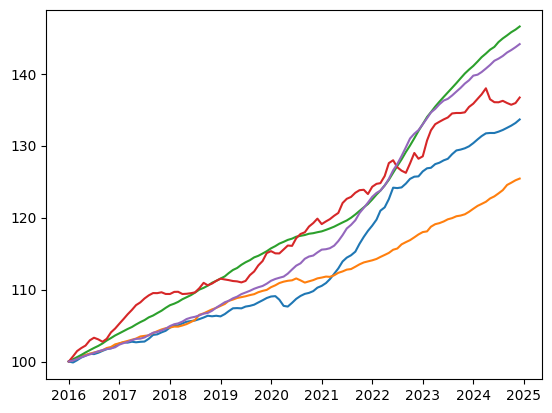

In [29]:
import matplotlib.pyplot as plt


plt.plot(official_cpi_norm, label='Official CPI')
plt.plot(tuition_norm, label='Tuition')
plt.plot(rent_norm, label='Rent')
plt.plot(spotify_norm, label='Spotify')
plt.plot(bbowl_norm, label='Burrito Bowl')

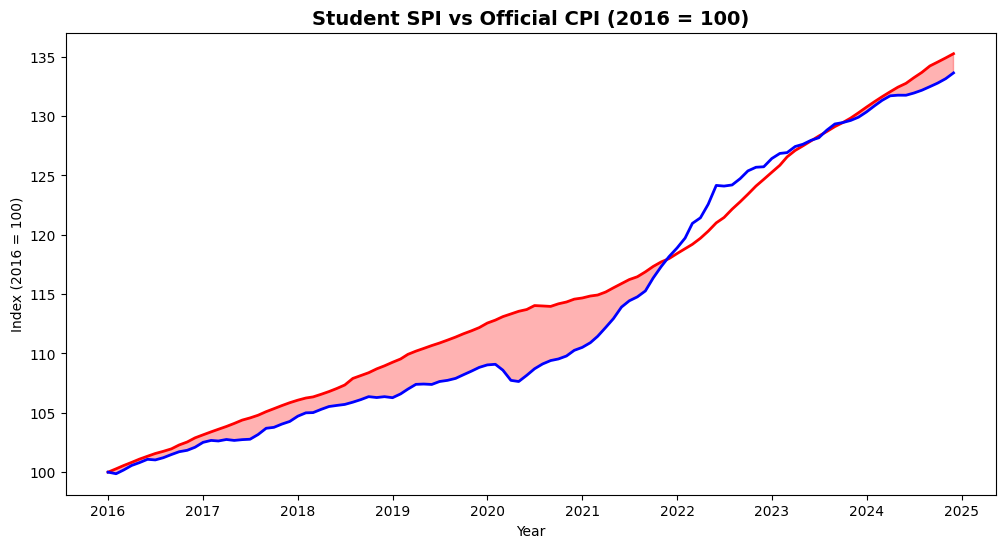

In [31]:
weights = {
    'Tuition': 0.5,
    'Rent': 0.35,
    'Spotify': 0.05,
    'Burrito_Bowl': 0.10,
}

student_spi = (tuition_norm * weights['Tuition'] +
               rent_norm * weights['Rent'] +
               spotify_norm * weights['Spotify'] +
               bbowl_norm * weights['Burrito_Bowl'])

plt.figure(figsize=(12, 6))

plt.plot(student_spi, label='Student SPI', linewidth=2, color='red')
plt.plot(official_cpi_norm, label='Official CPI', linewidth=2, color='blue')

plt.fill_between(student_spi.index, student_spi, official_cpi_norm,
                 where=(student_spi >= official_cpi_norm),
                 alpha=0.3, color='red',
                 label='Student Inflation Gap')

plt.title('Student SPI vs Official CPI (2016 = 100)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Index (2016 = 100)')
plt.show()

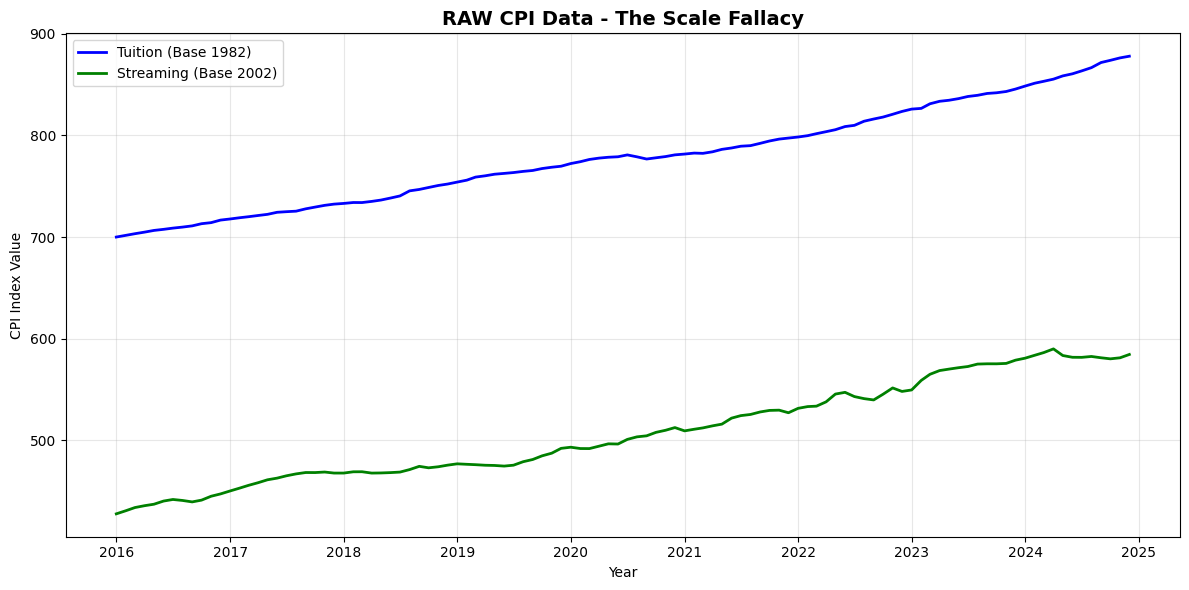

Tuition latest value: 877.99
Streaming latest value: 584.41


In [32]:
plt.figure(figsize=(12, 6))

plt.plot(tuition, label='Tuition (Base 1982)', linewidth=2, color='blue')
plt.plot(spotify, label='Streaming (Base 2002)', linewidth=2, color='green')

plt.title('RAW CPI Data - The Scale Fallacy', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('CPI Index Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Observe the values
print(f"Tuition latest value: {tuition.iloc[-1]:.2f}")
print(f"Streaming latest value: {spotify.iloc[-1]:.2f}")

/tmp/ipython-input-3774338934.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  boston_cpi_norm = boston_cpi_norm.fillna(method='ffill')


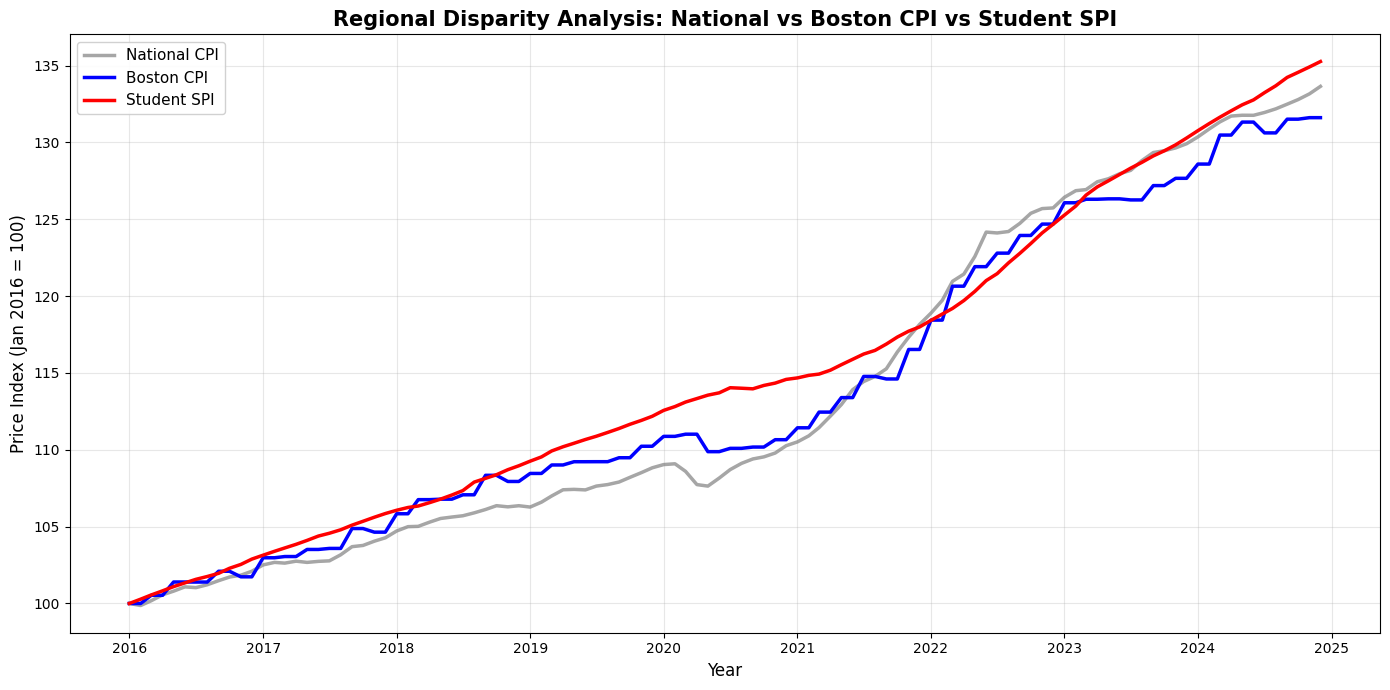


=== 2024 Index Values (Jan 2016 = 100) ===
National CPI:  133.64
Boston CPI:    131.61
Student SPI:   135.26


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Initialize FRED (assuming you already have your API key set)
fred = Fred(api_key='a5094d688b7f176c261a1e0b7cc49847')

# Fetch Boston CPI data (Monthly data from 2016-2024)
boston_cpi = fred.get_series('CUURA103SA0',
                              observation_start='2016-01-01',
                              observation_end='2024-12-31')

# Re-index Boston CPI to Jan 1, 2016 = 100
boston_cpi_norm = (boston_cpi / boston_cpi.iloc[0]) * 100

# Handle missing values (forward fill if bimonthly/missing data)
boston_cpi_norm = boston_cpi_norm.fillna(method='ffill')

# Assuming you already have df with 'Official_CPI' and 'Student_SPI' columns
# If they're separate series, convert to DataFrame:
df = pd.DataFrame({
    'National_CPI': official_cpi_norm,  # Your existing normalized national CPI
    'Student_SPI': student_spi,         # Your existing Student SPI
    'Boston_CPI': boston_cpi_norm
})

# Plot all three lines
plt.figure(figsize=(14, 7))

plt.plot(df.index, df['National_CPI'],
         label='National CPI', color='grey', linewidth=2.5, alpha=0.7)
plt.plot(df.index, df['Boston_CPI'],
         label='Boston CPI', color='blue', linewidth=2.5)
plt.plot(df.index, df['Student_SPI'],
         label='Student SPI', color='red', linewidth=2.5)

plt.title('Regional Disparity Analysis: National vs Boston CPI vs Student SPI',
          fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price Index (Jan 2016 = 100)', fontsize=12)
plt.legend(loc='upper left', fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== 2024 Index Values (Jan 2016 = 100) ===")
print(f"National CPI:  {df['National_CPI'].iloc[-1]:.2f}")
print(f"Boston CPI:    {df['Boston_CPI'].iloc[-1]:.2f}")
print(f"Student SPI:   {df['Student_SPI'].iloc[-1]:.2f}")